In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [2]:
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 7s 0us/step


In [3]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

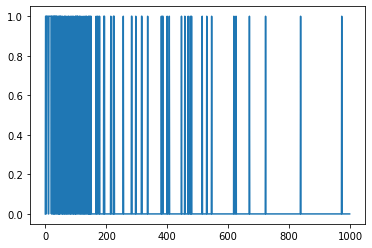

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.5702 - accuracy: 0.7135 - binary_crossentropy: 0.5702 - val_loss: 0.4271 - val_accuracy: 0.8246 - val_binary_crossentropy: 0.4271
Epoch 2/20
49/49 - 0s - loss: 0.3691 - accuracy: 0.8443 - binary_crossentropy: 0.3691 - val_loss: 0.3533 - val_accuracy: 0.8503 - val_binary_crossentropy: 0.3533
Epoch 3/20
49/49 - 0s - loss: 0.3238 - accuracy: 0.8664 - binary_crossentropy: 0.3238 - val_loss: 0.3307 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3307
Epoch 4/20
49/49 - 0s - loss: 0.3074 - accuracy: 0.8739 - binary_crossentropy: 0.3074 - val_loss: 0.3291 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3291
Epoch 5/20
49/49 - 0s - loss: 0.2990 - accuracy: 0.8775 - binary_crossentropy: 0.2990 - val_loss: 0.3306 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3306
Epoch 6/20
49/49 - 0s - loss: 0.2930 - accuracy: 0.8804 - binary_crossentropy: 0.2930 - val_loss: 0.3288 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3288
Epoch 7/20
49/49 - 0s - loss

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6746 - accuracy: 0.5276 - binary_crossentropy: 0.6746 - val_loss: 0.6237 - val_accuracy: 0.6474 - val_binary_crossentropy: 0.6237
Epoch 2/20
49/49 - 0s - loss: 0.5694 - accuracy: 0.7570 - binary_crossentropy: 0.5694 - val_loss: 0.5377 - val_accuracy: 0.8178 - val_binary_crossentropy: 0.5377
Epoch 3/20
49/49 - 0s - loss: 0.5130 - accuracy: 0.8322 - binary_crossentropy: 0.5130 - val_loss: 0.5054 - val_accuracy: 0.8304 - val_binary_crossentropy: 0.5054
Epoch 4/20
49/49 - 0s - loss: 0.4848 - accuracy: 0.8516 - binary_crossentropy: 0.4848 - val_loss: 0.4880 - val_accuracy: 0.8379 - val_binary_crossentropy: 0.4880
Epoch 5/20
49/49 - 0s - loss: 0.4660 - accuracy: 0.8619 - binary_crossentropy: 0.4660 - val_loss: 0.4728 - val_accuracy: 0.8511 - val_binary_crossentropy: 0.4728
Epoch 6/20
49/49 - 0s - loss: 0.4507 - accuracy: 0.8672 - binary_crossentropy: 0.4507 - val_loss: 0.4629 - val_accuracy: 0.8546 - val_binary_crossentropy: 0.4629
Epoch 7/20
49/49 - 0s - loss

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4056 - accuracy: 0.8168 - binary_crossentropy: 0.4056 - val_loss: 0.3374 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3374
Epoch 2/20
49/49 - 1s - loss: 0.2889 - accuracy: 0.8805 - binary_crossentropy: 0.2889 - val_loss: 0.3236 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3236
Epoch 3/20
49/49 - 1s - loss: 0.2174 - accuracy: 0.9133 - binary_crossentropy: 0.2174 - val_loss: 0.3544 - val_accuracy: 0.8511 - val_binary_crossentropy: 0.3544
Epoch 4/20
49/49 - 1s - loss: 0.1035 - accuracy: 0.9693 - binary_crossentropy: 0.1035 - val_loss: 0.4206 - val_accuracy: 0.8490 - val_binary_crossentropy: 0.4206
Epoch 5/20
49/49 - 1s - loss: 0.0247 - accuracy: 0.9956 - binary_crossentropy: 0.0247 - val_loss: 0.5167 - val_accuracy: 0.8462 - val_binary_crossentropy: 0.5167
Epoch 6/20
49/49 - 1s - loss: 0.0056 - accuracy: 0.9998 - binary_crossentropy: 0.0056 - val_loss: 0.6076 - val_accuracy: 0.8501 - val_binary_crossentropy: 0.6076
Epoch 7/20
49/49 - 1s - loss

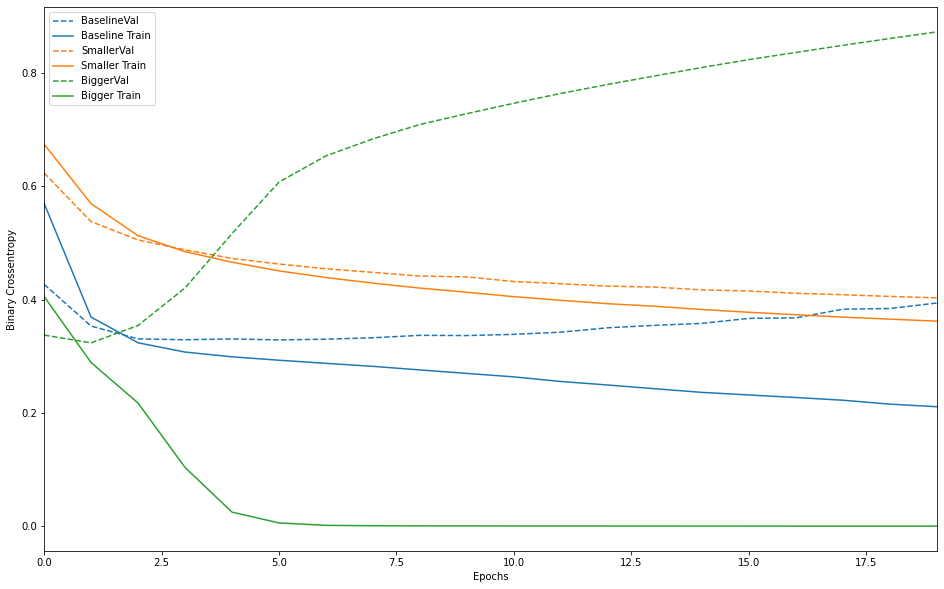

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title() + 'Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
                  ('smaller', smaller_history),
                  ('bigger', bigger_history)])

In [14]:
# l2(0.001) => 0.001 * weight_coefficient_value ** 2
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

In [15]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6321 - accuracy: 0.7128 - binary_crossentropy: 0.5896 - val_loss: 0.4957 - val_accuracy: 0.8193 - val_binary_crossentropy: 0.4557
Epoch 2/20
49/49 - 0s - loss: 0.4255 - accuracy: 0.8429 - binary_crossentropy: 0.3849 - val_loss: 0.3902 - val_accuracy: 0.8536 - val_binary_crossentropy: 0.3493
Epoch 3/20
49/49 - 0s - loss: 0.3676 - accuracy: 0.8644 - binary_crossentropy: 0.3269 - val_loss: 0.3747 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3345
Epoch 4/20
49/49 - 0s - loss: 0.3524 - accuracy: 0.8710 - binary_crossentropy: 0.3128 - val_loss: 0.3664 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3276
Epoch 5/20
49/49 - 0s - loss: 0.3448 - accuracy: 0.8742 - binary_crossentropy: 0.3068 - val_loss: 0.3690 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3318
Epoch 6/20
49/49 - 0s - loss: 0.3410 - accuracy: 0.8749 - binary_crossentropy: 0.3042 - val_loss: 0.3725 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3367
Epoch 7/20
49/49 - 0s - loss

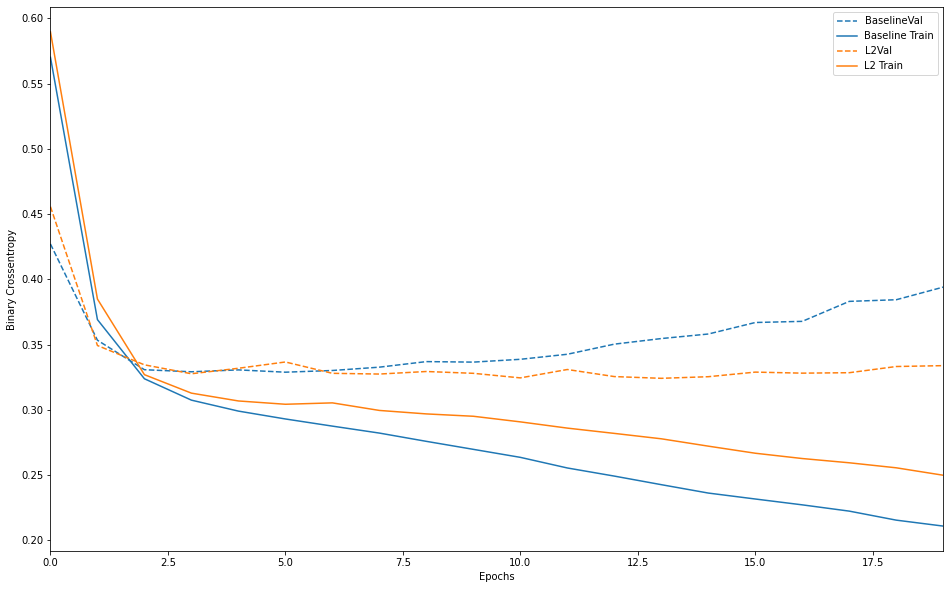

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6866 - accuracy: 0.5609 - binary_crossentropy: 0.6866 - val_loss: 0.6534 - val_accuracy: 0.6306 - val_binary_crossentropy: 0.6534
Epoch 2/20
49/49 - 0s - loss: 0.6218 - accuracy: 0.6863 - binary_crossentropy: 0.6218 - val_loss: 0.5581 - val_accuracy: 0.7808 - val_binary_crossentropy: 0.5581
Epoch 3/20
49/49 - 0s - loss: 0.5469 - accuracy: 0.7709 - binary_crossentropy: 0.5469 - val_loss: 0.4793 - val_accuracy: 0.8333 - val_binary_crossentropy: 0.4793
Epoch 4/20
49/49 - 0s - loss: 0.4906 - accuracy: 0.8087 - binary_crossentropy: 0.4906 - val_loss: 0.4278 - val_accuracy: 0.8466 - val_binary_crossentropy: 0.4278
Epoch 5/20
49/49 - 0s - loss: 0.4474 - accuracy: 0.8319 - binary_crossentropy: 0.4474 - val_loss: 0.3942 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.3942
Epoch 6/20
49/49 - 0s - loss: 0.4179 - accuracy: 0.8415 - binary_crossentropy: 0.4179 - val_loss: 0.3730 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3730
Epoch 7/20
49/49 - 0s - loss

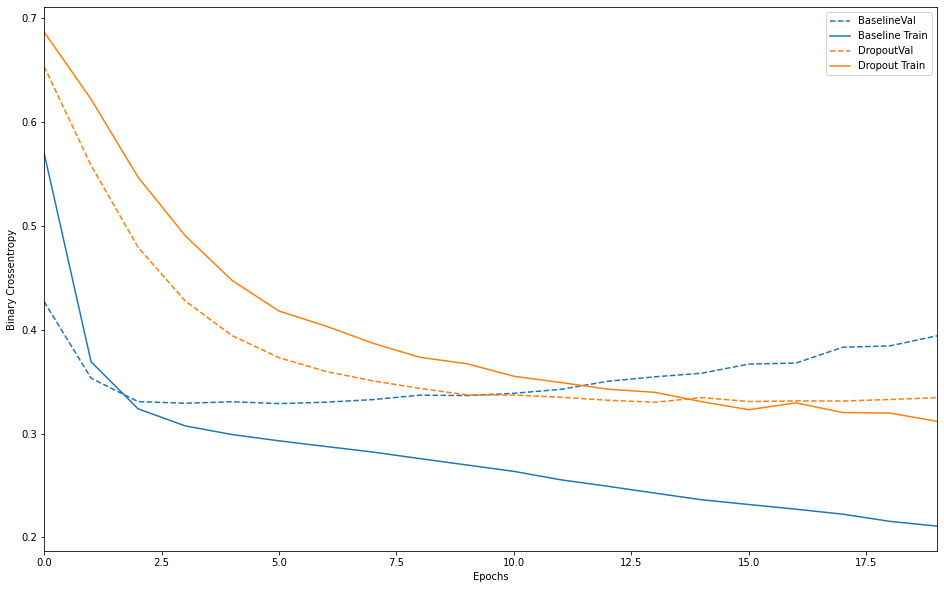

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])